<a href="https://www.kaggle.com/code/dunnguynduy/vcb-data-eda?scriptVersionId=191236034" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install vnstock

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from vnstock import *

Get data from vnstock

In [3]:
dataVCB =  stock_historical_data(symbol='VCB', 
                            start_date="2021-01-01", 
                            end_date='2024-07-31', resolution='1D', type='stock', beautify=True)

In [4]:
dataVCB

,time,open,high,low,close,volume,ticker
0,2021-01-04,64269,65450,63810,64930,855900,VCB
1,2021-01-05,64930,65980,64930,65120,739200,VCB
2,2021-01-06,65250,69650,65120,68860,2080400,VCB
3,2021-01-07,68200,71160,68200,70170,889000,VCB
4,2021-01-08,70830,70830,68530,68730,963900,VCB
...,...,...,...,...,...,...,...
887,2024-07-25,87600,87700,87200,87300,881000,VCB
888,2024-07-26,87300,87700,87200,87300,903300,VCB
889,2024-07-29,87600,87800,87300,87300,452800,VCB
890,2024-07-30,87300,88300,87300,87500,977800,VCB


Descriptive analysis

In [5]:
dataVCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    892 non-null    object
 1   open    892 non-null    int64 
 2   high    892 non-null    int64 
 3   low     892 non-null    int64 
 4   close   892 non-null    int64 
 5   volume  892 non-null    int64 
 6   ticker  892 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


In [6]:
dataVCB.describe()

,open,high,low,close,volume
count,892.000000,892.000000,892.000000,892.000000,8.920000e+02
mean,74666.956278,75481.161435,73826.636771,74665.402466,1.277852e+06
std,10930.238356,10894.727567,10989.500275,10930.731618,6.584423e+05
min,53340.000000,55290.000000,52500.000000,52500.000000,1.139000e+05
25%,65030.000000,65580.000000,64229.250000,64954.250000,8.335500e+05
50%,70850.000000,71675.000000,69860.000000,70830.000000,1.145100e+06
75%,86000.000000,86540.000000,85225.000000,86000.000000,1.563375e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,6.274200e+06


In [7]:
dataVCB['time'] = pd.to_datetime(dataVCB['time'])
dataVCB.set_index('time', inplace=True)
dataVCB.sort_index(inplace=True)
print(dataVCB.head())

             open   high    low  close   volume ticker
time                                                  
2021-01-04  64269  65450  63810  64930   855900    VCB
2021-01-05  64930  65980  64930  65120   739200    VCB
2021-01-06  65250  69650  65120  68860  2080400    VCB
2021-01-07  68200  71160  68200  70170   889000    VCB
2021-01-08  70830  70830  68530  68730   963900    VCB


Visualize data

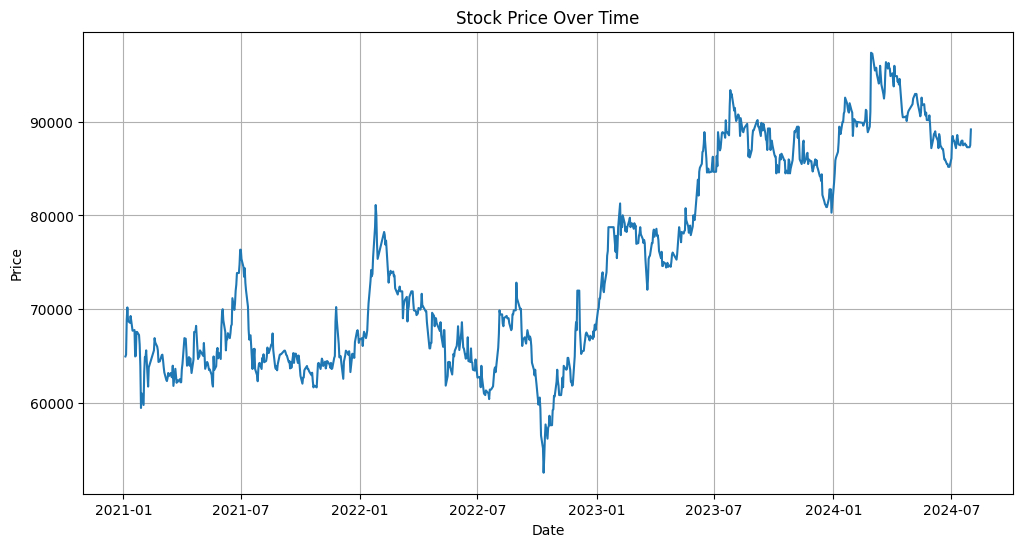

In [8]:
# plot the stock price over time
def plot_stock_price(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['close'])
    plt.title('Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

plot_stock_price(dataVCB)

The stock price has shown a general upward trend from 2021 to 2024, with significant volatility. Key observations:
* Starting around 65,000 in early 2021
* Reached peaks around 95,000-97,000 in late 2023/early 2024
* Experienced a major dip to about 52,000 in late 2022
* Currently trading around 88,000-89,000 as of mid-2024

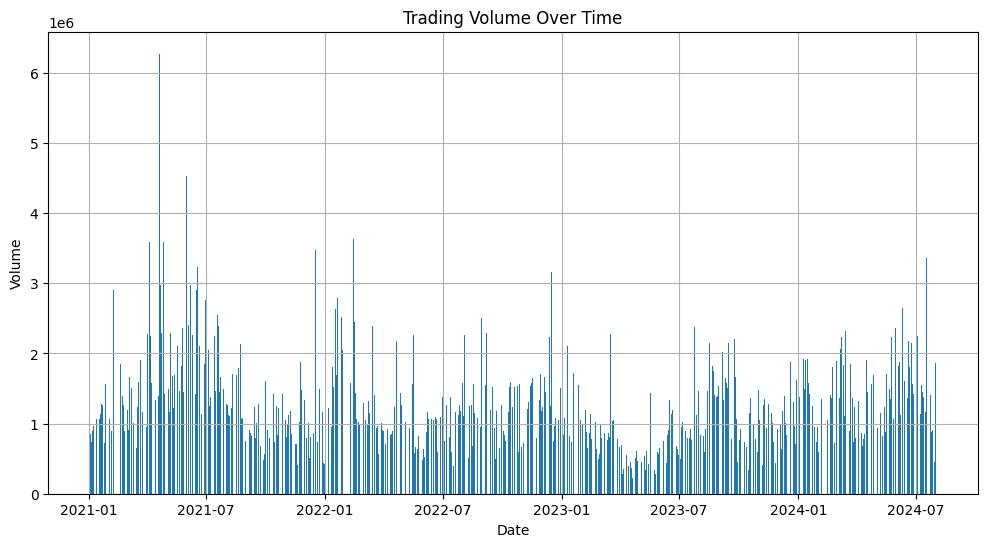

In [9]:
# plot the trading volume
def plot_volume(data):
    plt.figure(figsize=(12, 6))
    plt.bar(data.index, data['volume'])
    plt.title('Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.show()

plot_volume(dataVCB)

* Highly variable trading volumes over time
* Highest volume spikes occurred in mid-2021, reaching over 4 million shares traded
* Recent trading volumes (2024) show increased activity compared to 2023

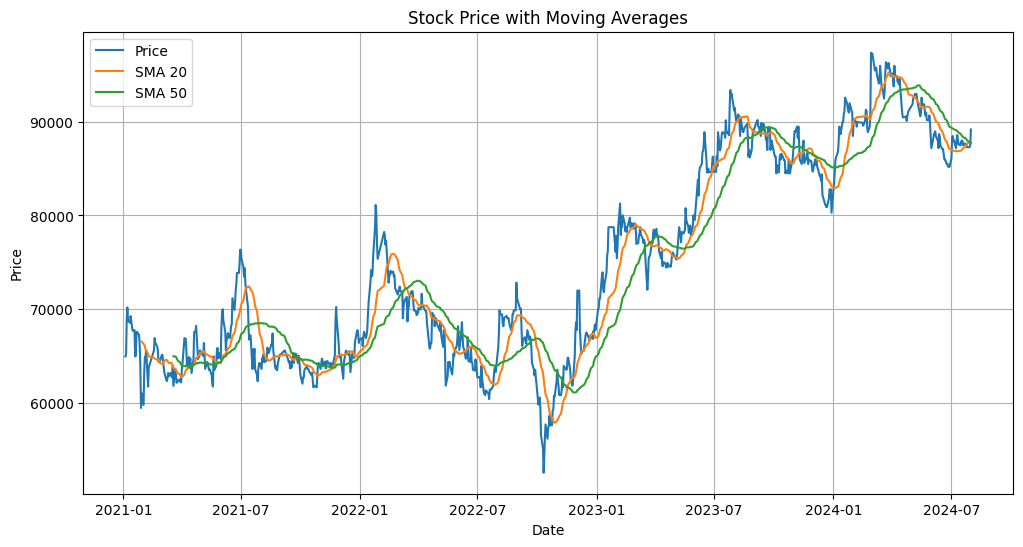

In [10]:
# calculate and plot the moving averages
def plot_moving_averages(data, short_window=20, long_window=50):
    data['SMA20'] = data['close'].rolling(window=short_window).mean()
    data['SMA50'] = data['close'].rolling(window=long_window).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['close'], label='Price')
    plt.plot(data.index, data['SMA20'], label=f'SMA {short_window}')
    plt.plot(data.index, data['SMA50'], label=f'SMA {long_window}')
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_moving_averages(dataVCB)

* 20-day SMA (orange line) is more responsive to price changes
* 50-day SMA (green line) shows the longer-term trend
* Crossovers between these lines can indicate potential trend changes

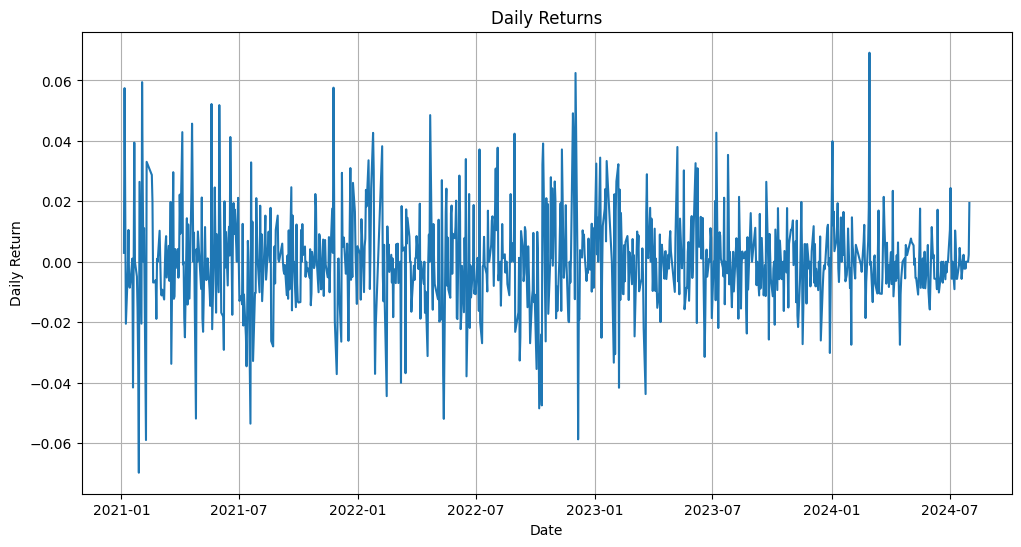

In [11]:
# plot daily return
def plot_daily_returns(data):
    data['Daily_Return'] = data['close'].pct_change()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Daily_Return'])
    plt.title('Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.show()

plot_daily_returns(dataVCB)

* Daily returns fluctuate between approximately -6% to +6%
* Most daily returns fall within the -2% to +2% range
* Some extreme moves (both positive and negative) are visible

In [12]:
# Test stationarity
def test_stationarity(timeseries):
    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("The series is stationary (95% confidence level)")
    else:
        print("The series is not stationary (95% confidence level)")

test_stationarity(dataVCB['close'])

ADF Statistic: -1.1197612263385706
p-value: 0.7071273680868411
Critical Values: {'1%': -3.4377354773501243, '5%': -2.8648002689134535, '10%': -2.5685059946940183}
The series is not stationary (95% confidence level)


The series is not stationary

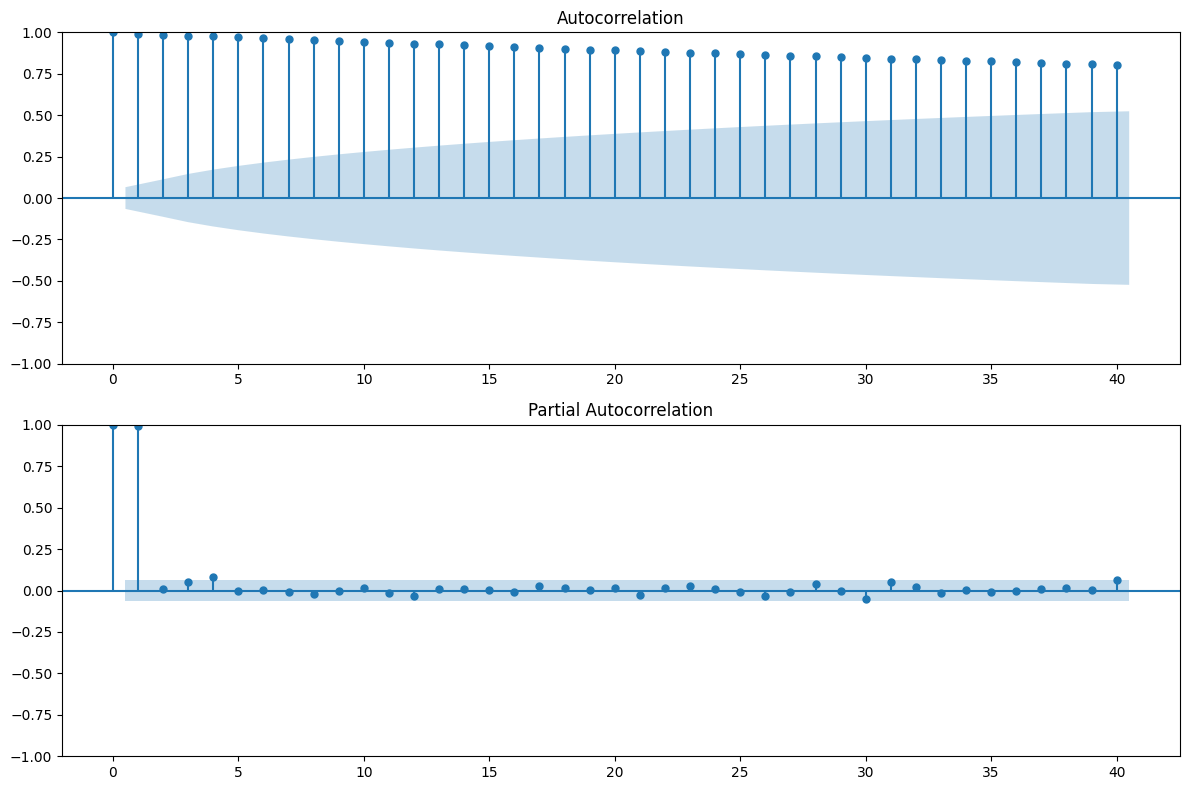

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataVCB['close'], ax=ax1, lags=40)
plot_pacf(dataVCB['close'], ax=ax2, lags=40)
plt.tight_layout()
plt.show()

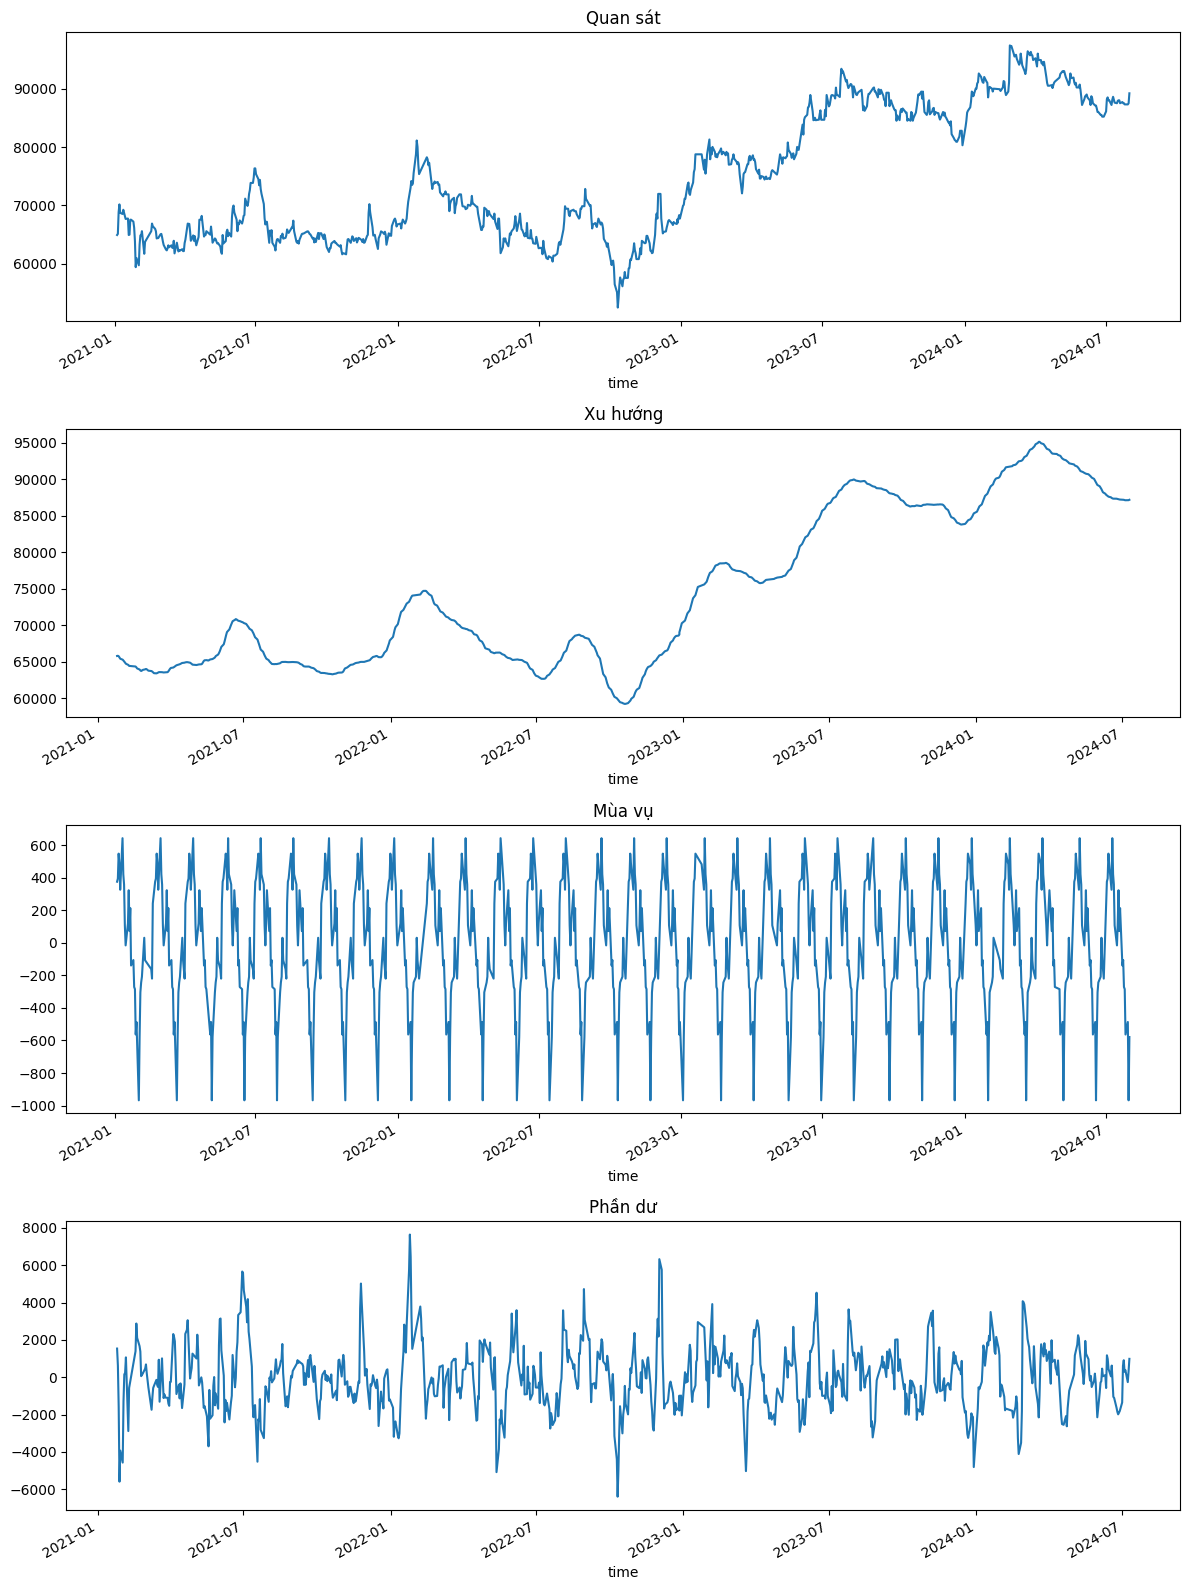

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataVCB['close'], model='additive', period=30)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(12,16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Quan sát')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Xu hướng')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Mùa vụ')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Phần dư')
plt.tight_layout()
plt.show()

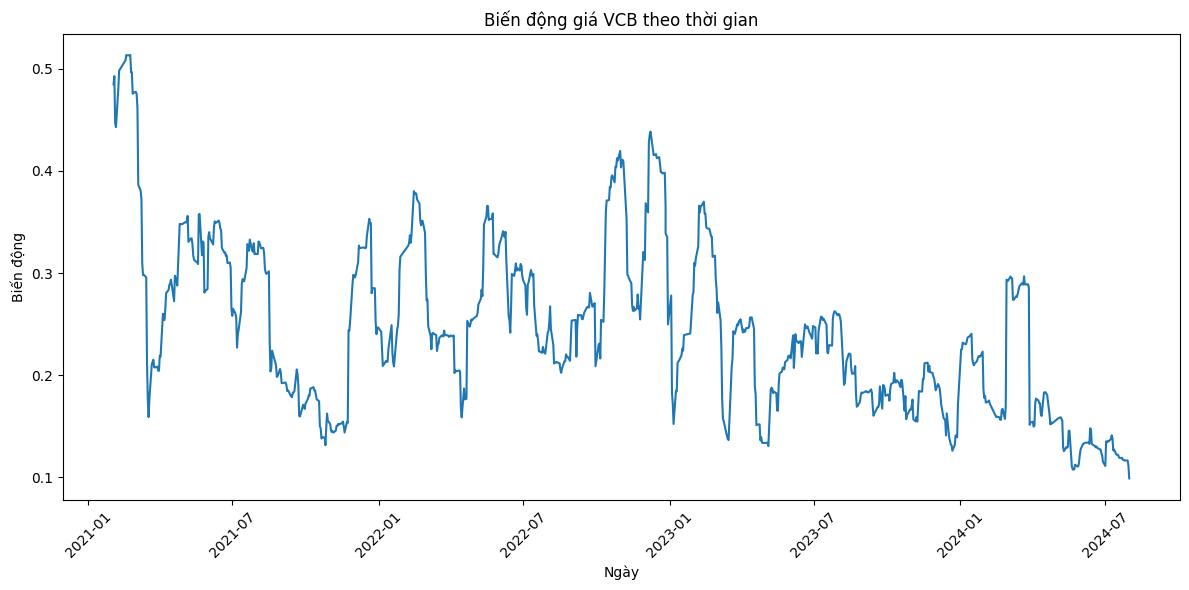

In [15]:
dataVCB['Returns'] = dataVCB['close'].pct_change()
dataVCB['Volatility'] = dataVCB['Returns'].rolling(window=21).std() * np.sqrt(252)  # Biến động hàng năm

plt.figure(figsize=(12,6))
plt.plot(dataVCB.index, dataVCB['Volatility'])
plt.title('Biến động giá VCB theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Biến động')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


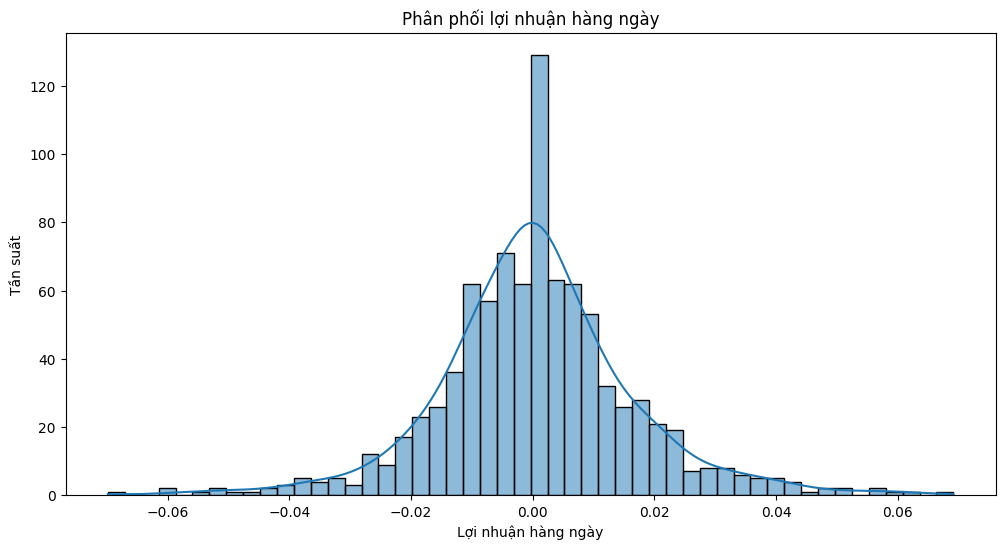

count    891.000000
mean       0.000487
std        0.016186
min       -0.069818
25%       -0.008171
50%        0.000000
75%        0.008569
max        0.069155
Name: Returns, dtype: float64


In [16]:
plt.figure(figsize=(12,6))
sns.histplot(dataVCB['Returns'].dropna(), kde=True, bins=50)
plt.title('Phân phối lợi nhuận hàng ngày')
plt.xlabel('Lợi nhuận hàng ngày')
plt.ylabel('Tần suất')
plt.show()

print(dataVCB['Returns'].describe())

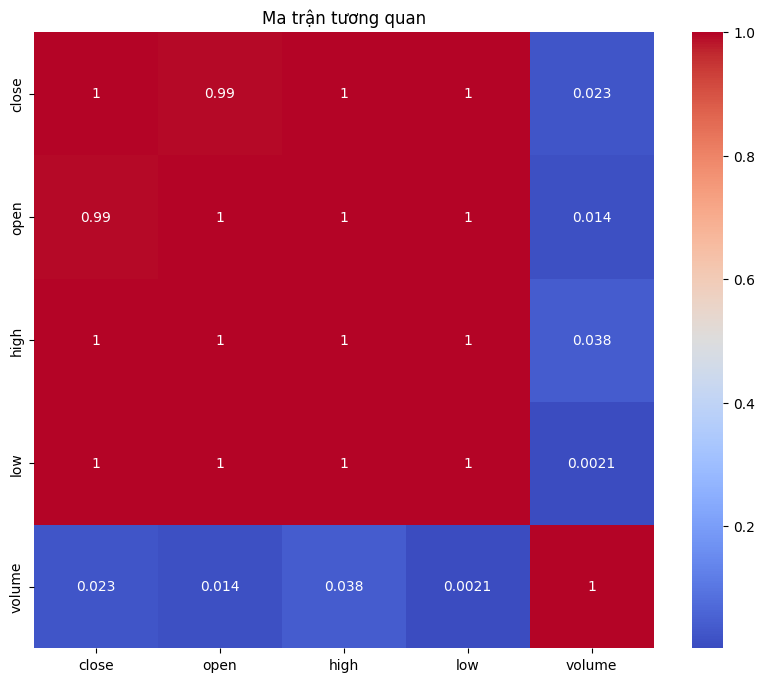

In [17]:
correlation_matrix = dataVCB[['close', 'open', 'high', 'low', 'volume']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

* The autocorrelation plot shows significant correlation at lag 1, indicating some short-term predictability
* Partial autocorrelation also shows a significant spike at lag 1
* Beyond lag 1, correlations are much weaker, suggesting limited longer-term predictability

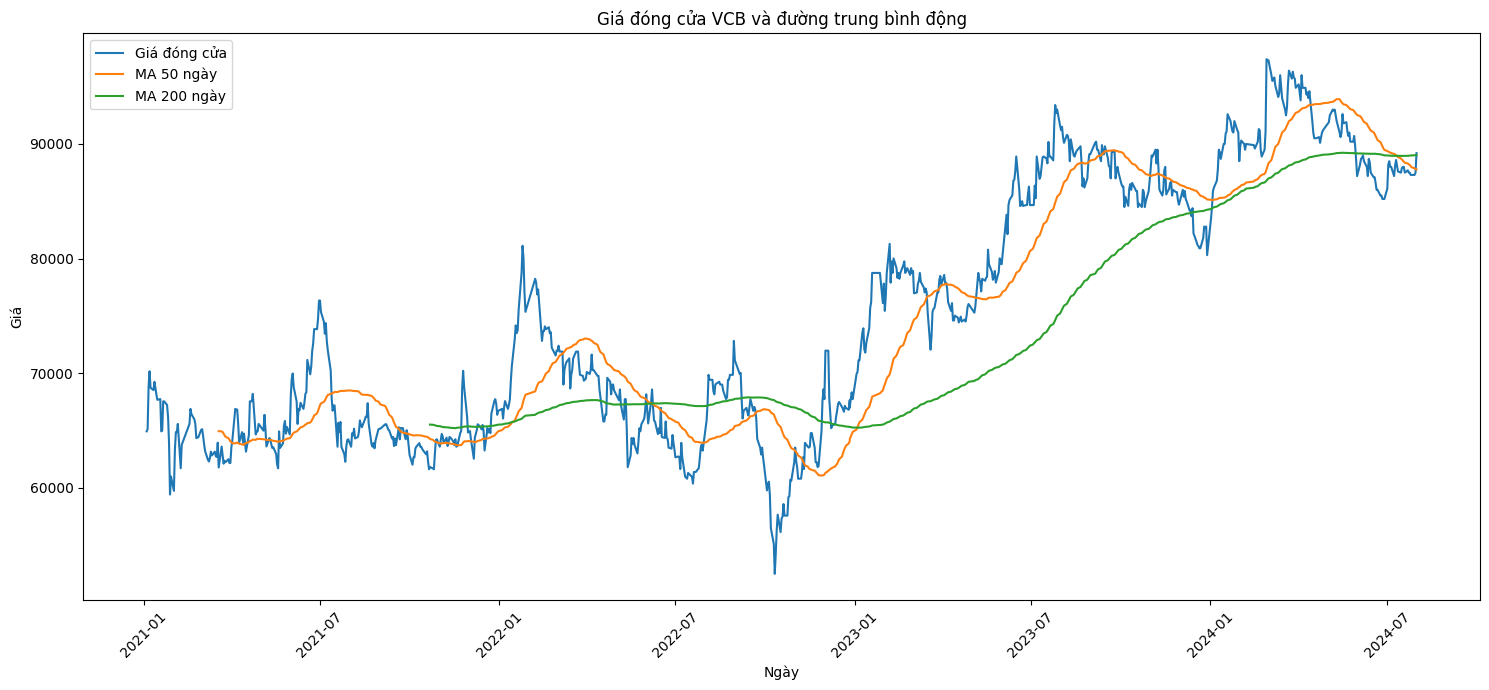

In [18]:
dataVCB['MA_50'] = dataVCB['close'].rolling(window=50).mean()
dataVCB['MA_200'] = dataVCB['close'].rolling(window=200).mean()

plt.figure(figsize=(15,7))
plt.plot(dataVCB.index, dataVCB['close'], label='Giá đóng cửa')
plt.plot(dataVCB.index, dataVCB['MA_50'], label='MA 50 ngày')
plt.plot(dataVCB.index, dataVCB['MA_200'], label='MA 200 ngày')
plt.title('Giá đóng cửa VCB và đường trung bình động')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

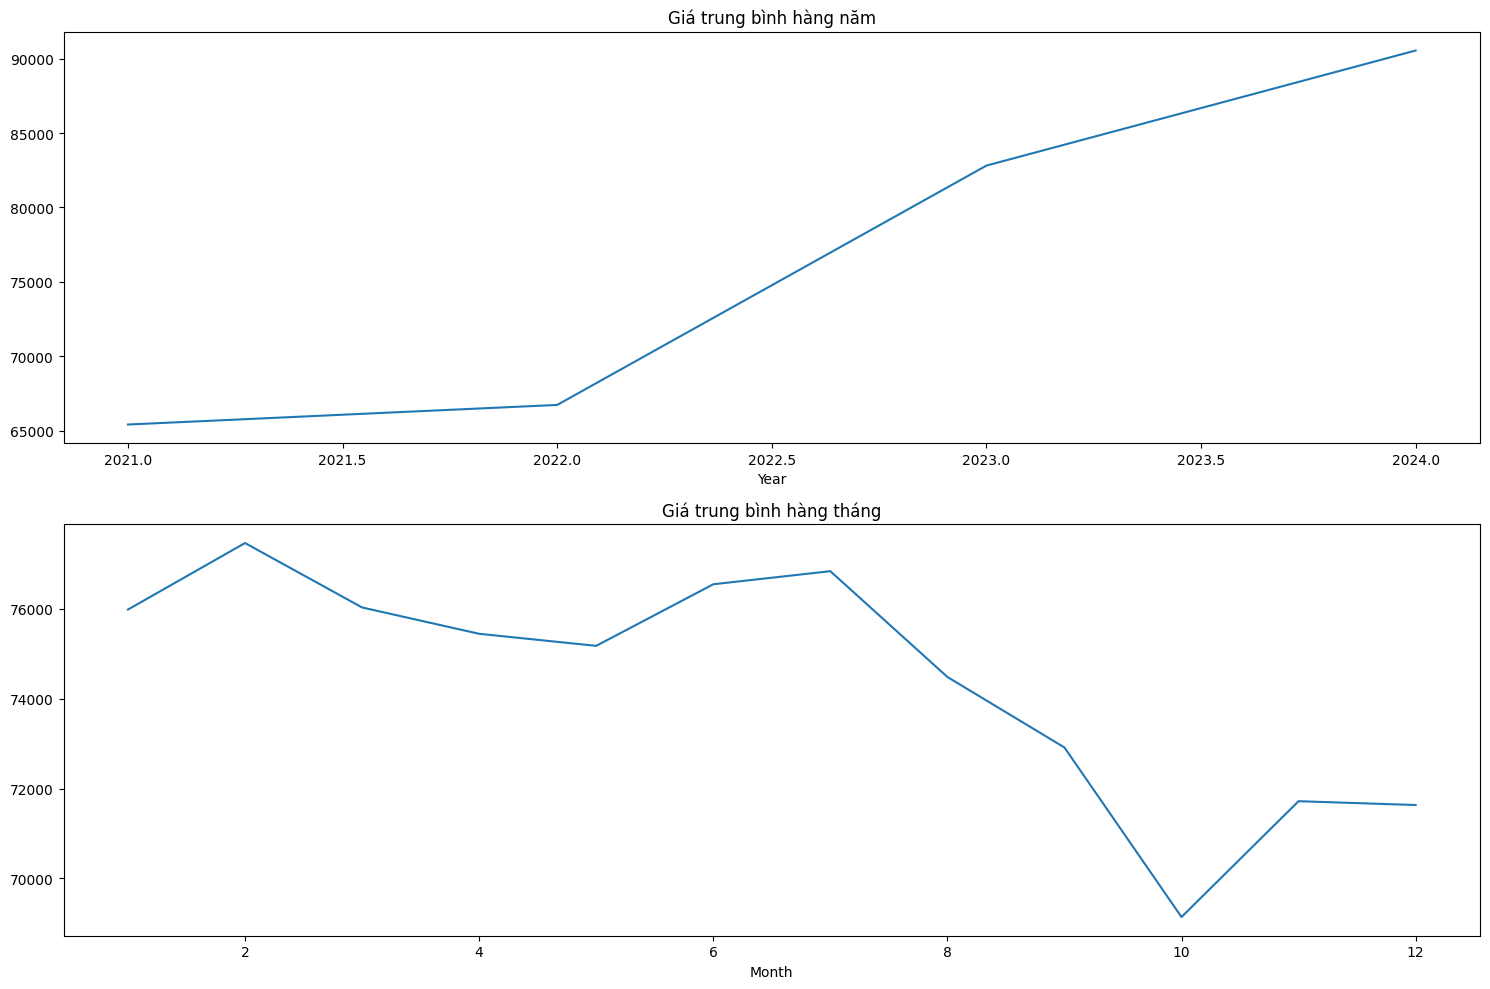

In [19]:
dataVCB['Year'] = dataVCB.index.year
dataVCB['Month'] = dataVCB.index.month

yearly_avg = dataVCB.groupby('Year')['close'].mean()
monthly_avg = dataVCB.groupby('Month')['close'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
yearly_avg.plot(ax=ax1)
ax1.set_title('Giá trung bình hàng năm')
monthly_avg.plot(ax=ax2)
ax2.set_title('Giá trung bình hàng tháng')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataVCB['Close_standardized'] = scaler.fit_transform(dataVCB[['close']])
dataVCB.head()

,open,high,low,close,volume,ticker,SMA20,SMA50,Daily_Return,Returns,Volatility,MA_50,MA_200,Year,Month,Close_standardized
time,,,,,,,,,,,,,,,,
2021-01-04,64269,65450,63810,64930,855900,VCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,-0.891145
2021-01-05,64930,65980,64930,65120,739200,VCB,NaN,NaN,0.002926,0.002926,NaN,NaN,NaN,2021,1,-0.873753
2021-01-06,65250,69650,65120,68860,2080400,VCB,NaN,NaN,0.057432,0.057432,NaN,NaN,NaN,2021,1,-0.531406
2021-01-07,68200,71160,68200,70170,889000,VCB,NaN,NaN,0.019024,0.019024,NaN,NaN,NaN,2021,1,-0.411493
2021-01-08,70830,70830,68530,68730,963900,VCB,NaN,NaN,-0.020522,-0.020522,NaN,NaN,NaN,2021,1,-0.543306


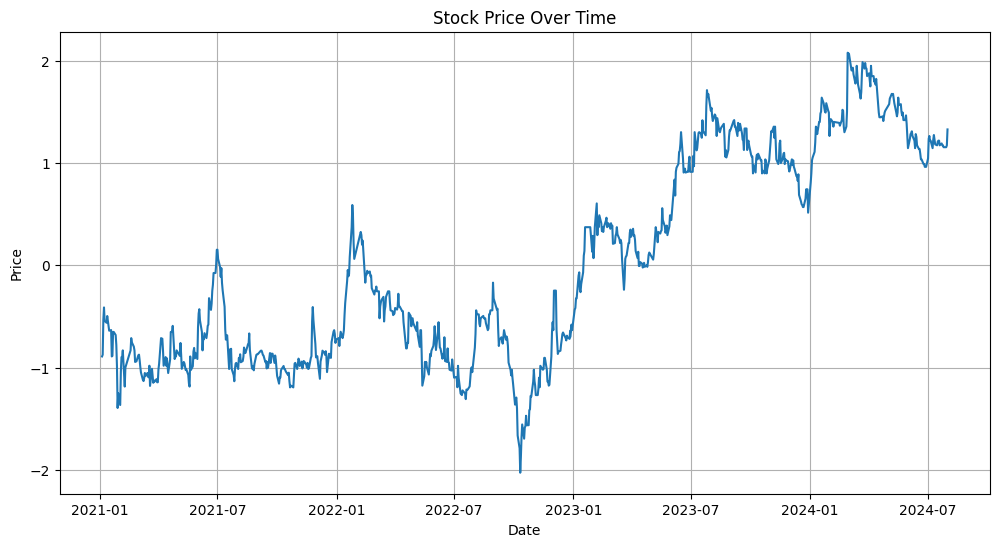

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(dataVCB.index, dataVCB['Close_standardized'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [22]:
dataVCB[['open','high','low','close','volume','Close_standardized']].to_csv('/kaggle/working/data.csv', index=True)

In [23]:
df = pd.read_csv('/kaggle/working/data.csv')
df.head()

,time,open,high,low,close,volume,Close_standardized
0,2021-01-04,64269,65450,63810,64930,855900,-0.891145
1,2021-01-05,64930,65980,64930,65120,739200,-0.873753
2,2021-01-06,65250,69650,65120,68860,2080400,-0.531406
3,2021-01-07,68200,71160,68200,70170,889000,-0.411493
4,2021-01-08,70830,70830,68530,68730,963900,-0.543306


In [24]:
pip install liac-arff

  Preparing metadata (setup.py) ... - done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=da3f2415d297380bd1a9b2b7aa16c6b07a3df5b865a9943065b1ec65c69ef0e4
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [25]:
import arff

# Convert dataframe to .arff
arff_data = {
    'description': '',
    'relation': 'dataVCB',
    'attributes': [
        ('time', 'STRING'),
        ('open', 'NUMERIC'),
        ('high', 'NUMERIC'),
        ('low', 'NUMERIC'),
        ('close', 'NUMERIC'),
        ('volume', 'NUMERIC'),
        ('Close_standardized', 'NUMERIC')
    ],
    'data': df.values
}

# Save to ARFF file
arff_file = "/kaggle/working/dataVCB.arff"
with open(arff_file, 'w') as f:
    arff.dump(arff_data, f)